#Introducción al aprendizaje computacional (Machine Learning):
## Utilizando la librería scikitlearn


Este taller guiado tiene como objetivo mostrar la implementación del algoritmo Redes Neuronales de Machine Learning usando scikitlearn.

En este taller guiado veremos como:

Entrenar y evaluar un modelo de clasificación creado con una Red Neuronal Artifical (RNA) - Percepectrón Multicapa

#1. Importar librería sklearn
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" alt = "Encabezado" width = "30%">  </img>

In [1]:
!pip install -U scikit-learn
import sklearn
print(sklearn.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
1.5.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import time
from datetime import datetime

## **2. Cargar datos**
Para este taller vamos a crear un dataset de manera manual

Este DataSet tendrá 10000 entradas, 4 características o columnas, 2 clases.

In [3]:
from sklearn.datasets import make_classification

X,y = make_classification (n_samples=10000,
                           n_features=4,
                           n_classes=2,
                           random_state=0,
                           shift=14,
                           scale=40)

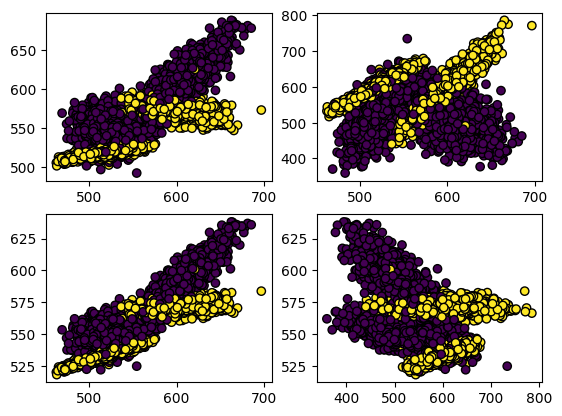

In [4]:
fig, axes = plt.subplots(2,2)


axes[0,0].scatter(X[:,0], X[:,1],marker="o",c=y,edgecolors="k")
axes[0,1].scatter(X[:,0], X[:,2],marker="o",c=y,edgecolors="k")
axes[1,0].scatter(X[:,0], X[:,3],marker="o",c=y,edgecolors="k")
axes[1,1].scatter(X[:,2], X[:,3],marker="o",c=y,edgecolors="k")
plt.show()

#Exploración

In [7]:
pd.DataFrame(X).describe()

,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,559.714252,559.981665,559.534219,559.955155
std,45.218317,34.497212,59.212988,22.230776
min,462.655415,492.624343,359.377165,518.381176
25%,519.481289,525.847695,517.086683,539.361258
50%,551.195134,561.759414,564.323968,560.002317
75%,599.907139,578.130891,602.415356,573.733996
max,696.876348,688.281978,785.504035,638.031689


In [ ]:
datos = pd.DataFrame(X)
datos['objetivo'] = y
datos

KeyboardInterrupt: 

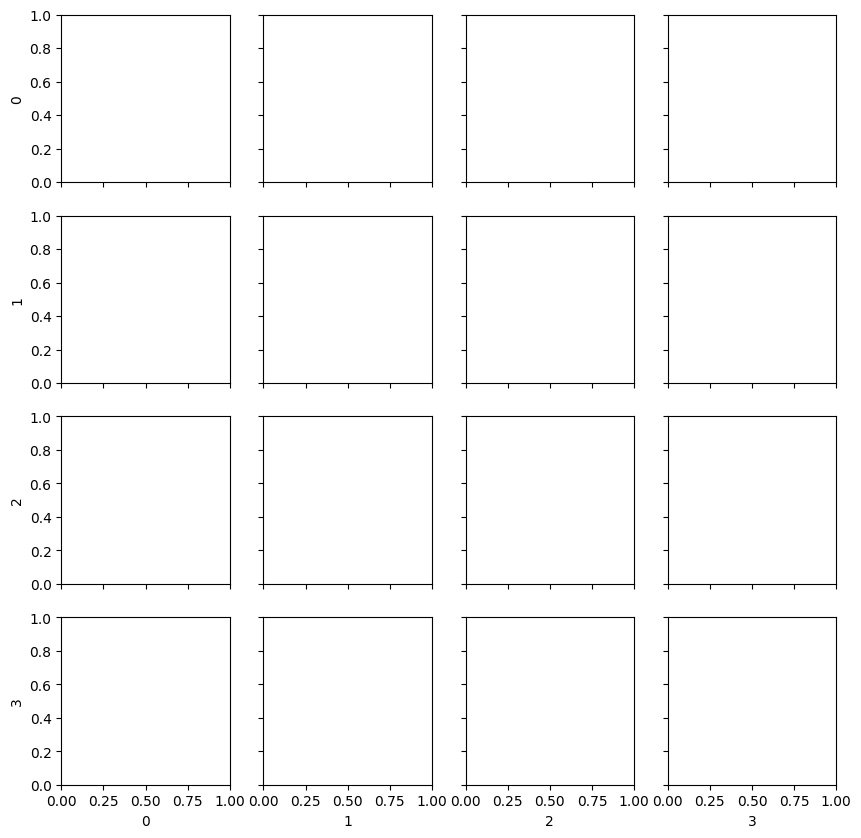

In [8]:
sb.pairplot(data = datos, hue = 'objetivo')

#4. Transformación de variables

Commo este dataset fue creado manualmente, no se tiene ninguna variable predictora categórica. Entonces lo que se hará es hacer escalado de las variables numéricas para crear ``X_scale``


In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)
X_scale = sc.fit_transform(X)

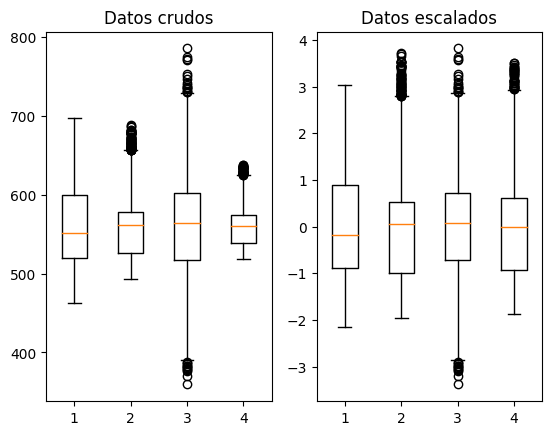

In [10]:
fig, axes = plt.subplots(1,2)

axes[0].boxplot(X)
axes[0].set_title('Datos crudos')
axes[1].boxplot(X_scale)
axes[1].set_title('Datos escalados')

plt.show();

#Partición del DataSet (Entrenamiento y Prueba)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scale,y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30%
    random_state = 4  # Semilla aleatoria que sirve para reproducibilidad
)

In [12]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (7000, 4)
Dimensiones de y de entrenamiento: (7000,)

Dimensiones de X de prueba: (3000, 4)
Dimensiones de y de prueba: (3000,)


#Modelamiento

In [13]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
# MultiLayerPerceptron
# También puede utilizar redes neuronales para resolver problemas de regesión

# (4, 50,50,50 ,2)

inicio = datetime.now()
mlp = MLPClassifier(
        hidden_layer_sizes = (50,50,50), # Estructura, 3 capas ocultas, cada capa con 50 neuronas
        activation = 'logistic',
        solver = 'adam',
        max_iter = 1000,
        random_state = 40
)

%time mlp.fit(X_train,y_train)
fin = datetime.now()

print(fin - inicio)

CPU times: user 2.15 s, sys: 2.05 s, total: 4.2 s
Wall time: 2.96 s
0:00:02.960987


In [14]:
mlp.n_layers_

5

In [15]:
mlp.n_iter_

24

Text(0, 0.5, 'Error')

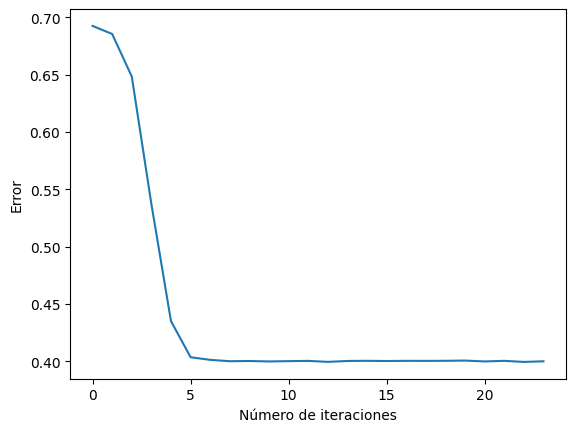

In [16]:
x = mlp.loss_curve_
plt.plot(x)
plt.xlabel('Número de iteraciones')
plt.ylabel('Error')

#7. Evaluación del desempeño del modelo

In [17]:
y_predict_test = mlp.predict(X_test)

y_predict_train = mlp.predict(X_train)

#Matriz de confusión

In [18]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_predict_test)
matrix

array([[1201,  277],
       [ 262, 1260]])

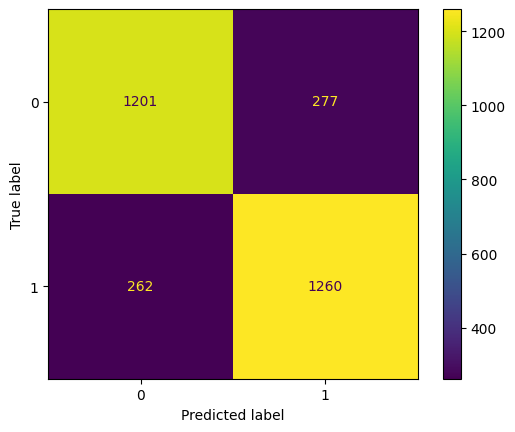

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(matrix)
disp.plot()

#Métrica Exactitud

In [20]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_predict_test)
print('Exactitud en partición de prueba: {:3f}'.format(acc_test))

acc_train = accuracy_score(y_train, y_predict_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_train))

Exactitud en partición de prueba: 0.820333
Exactitud en partición de entrenamiento: 0.828429


#Métrica Recall

In [21]:
from sklearn.metrics import recall_score

rec_test = recall_score(y_test, y_predict_test)
print('Recall en partición de prueba: {:3f}'.format(rec_test))

rec_train = recall_score(y_train, y_predict_train)
print('Recall en partición de entrenamiento: {:3f}'.format(rec_train))

Recall en partición de prueba: 0.827858
Recall en partición de entrenamiento: 0.835294


#Métrica Precisión

In [22]:
from sklearn.metrics import precision_score

prec_test = precision_score(y_test, y_predict_test)
print('Recall en partición de prueba: {:3f}'.format(prec_test))

prec_train = precision_score(y_train, y_predict_train)
print('Recall en partición de entrenamiento: {:3f}'.format(prec_train))

Recall en partición de prueba: 0.819779
Recall en partición de entrenamiento: 0.822781


#F1 Score
$$  F1= (1 +\beta^2) * \frac{Precision * Recall}{(\beta^2 * Precision) + Recall}  $$

In [23]:
from sklearn.metrics import f1_score

f1_test = f1_score(y_test,y_predict_test)
print('F1-score en partición de prueba: {:3f}'.format(f1_test))

f1_train = f1_score(y_train,y_predict_train)
print('F1-score en partición de entrenamiento: {:3f}'.format(f1_train))

F1-score en partición de prueba: 0.823799
F1-score en partición de entrenamiento: 0.828990


#8. Búsqueda de parámetros

Experimente, primero, con los solver disponibles para entrenar el perceptrón multicapa. En este caso se evaluará la exactitud.

Recuerde que según su interés le conviene usar una u otra métrica de evaluación.

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from tqdm import tqdm

accuracy = []
precision = []
tiempos = []

for solver in tqdm(('lbfgs','sgd','adam')):

  mlp = MLPClassifier(
        hidden_layer_sizes = (6,6,6),
        activation = 'relu',
        solver = solver,
        max_iter = 10000, # Aumentamos las iteraciones para que los solver puedan converger
        random_state = 40
        )
  inicio = datetime.now()
  mlp.fit(X_train,y_train)
  fin = datetime.now()
  tiempo = fin-inicio
  tiempo = tiempo.total_seconds()


  y_pred = mlp.predict(X_test)

  accuracy.append(accuracy_score(y_test,y_pred))
  precision.append(precision_score(y_test,y_pred))
  tiempos.append(tiempo)
  print('Se entrenó modelo')

 33%|███▎      | 1/3 [00:06<00:13,  6.75s/it]

Se entrenó modelo


 67%|██████▋   | 2/3 [00:13<00:06,  6.68s/it]

Se entrenó modelo


100%|██████████| 3/3 [00:16<00:00,  5.64s/it]

Se entrenó modelo


**Para el uso de solver se puede apreciar que las diferencias tanto de exactitud y precisión son pequeñas. Una de las condiciones más importantes para usar uno u otro solver puede ser la cantidad de iteraciones necesarias para convergencia y su tiempo para ello.**

In [25]:
accuracy

[0.9096666666666666, 0.9073333333333333, 0.9103333333333333]

In [26]:
precision

[0.9001919385796545, 0.88442521631644, 0.8879256965944272]

In [27]:
tiempos

[6.747242, 6.623719, 3.516485]

Text(0, 0.5, 'Exactitud en prueba')

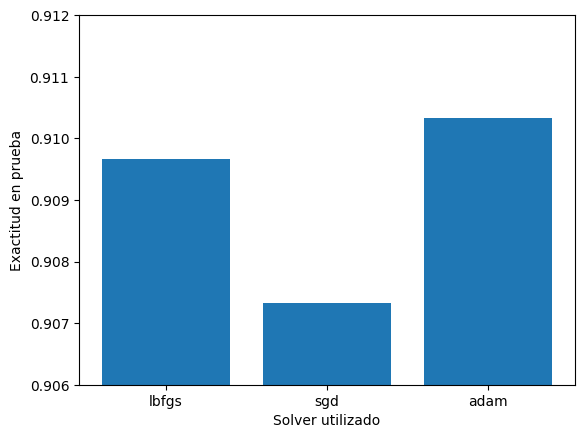

In [28]:
solver =  ('lbfgs','sgd','adam')

plt.bar(solver,accuracy)
plt.ylim((0.906,0.912))
plt.xlabel('Solver utilizado')
plt.ylabel('Exactitud en prueba')

In [ ]:
mlp_final = MLPClassifier(
        hidden_layer_sizes = (6,6,6,6,6),
        activation = 'relu',
        solver = 'adam',
        max_iter = 1000,
        random_state = 40
        )

In [31]:
mlp_final_RN = MLPClassifier(
        hidden_layer_sizes = (63, 73, 52),
        alpha= 0.1261856883066021,
        activation = 'relu',
        solver = 'adam',
        max_iter = 1000,
        random_state = 40
        )
%time mlp_final_RN.fit(X_train,y_train)
fin = datetime.now()

print(fin - inicio)

CPU times: user 9.7 s, sys: 6.23 s, total: 15.9 s
Wall time: 10.3 s
0:07:36.312990


In [ ]:
accuracy_score(y_test,mlp_final.predict(X_test))

In [ ]:
precision_score(y_test,mlp_final.predict(X_test))

#9. Validación cruzada

In [29]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

param_dist = {
    'hidden_layer_sizes': [(n1, n2, n3) for n1 in range(2, 101) for n2 in range(2, 101) for n3 in range(2, 101)],
    'alpha': np.logspace(-5, 2, 100)
}

# Crea un clasificador MLP
mlp = MLPClassifier(random_state=42, solver = 'adam')

# Realiza la búsqueda aleatoria
random_search = RandomizedSearchCV(
    mlp,
    param_distributions=param_dist,
    n_iter=3,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2,
    scoring = ['accuracy','precision','recall'],
    refit = 'recall'
    )

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-05, 1.17681195e-05, 1.38488637e-05, 1.62975083e-05,
       1.91791026e-05, 2.25701972e-05, 2.65608778e-05, 3.12571585e-05,
       3.67837977e-05, 4.32876128e-05, 5.09413801e-05, 5.99484250e-05,
       7.05480231e-05, 8.30217568e-05, 9.77009957e-05, 1.149...
                                        'hidden_layer_sizes': [(2, 2, 2),
                                                               (2, 2, 3),
                                                               (2, 2, 4),
                                                               (2, 2, 5),
                                                               (2, 2, 6),
                                                               (2, 2, 7),
                                                               (2, 2, 8),
                                                               (2, 2, 9),
                                                               (2, 2, 10),
                                                               (2, 2, 11),
                                                               (2, 2, 12),
                                                               (2, 2, 13),
                                                               (2, 2, 14),
                                                               (2, 2, 15),
                                                               (2, 2, 16),
                                                               (2, 2, 17),
                                                               (2, 2, 18),
                                                               (2, 2, 19),
                                                               (2, 2, 20),
                                                               (2, 2, 21),
                                                               (2, 2, 22),
                                                               (2, 2, 23),
                                                               (2, 2, 24),
                                                               (2, 2, 25),
                                                               (2, 2, 26),
                                                               (2, 2, 27),
                                                               (2, 2, 28),
                                                               (2, 2, 29),
                                                               (2, 2, 30),
                                                               (2, 2, 31), ...]},
                   random_state=42, refit='recall',
                   scoring=['accuracy', 'precision', 'recall'], verbose=2)

In [30]:
resultados = pd.DataFrame(random_search.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_alpha,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,7.741221,1.174551,0.020001,0.007212,"(70, 66, 32)",0.546228,"{'hidden_layer_sizes': (70, 66, 32), 'alpha': ...",0.923571,0.911429,0.912857,...,0.006776,3,0.964132,0.939742,0.949785,0.945481,0.946915,0.949211,0.008146,1
1,8.713595,1.864601,0.015222,0.003364,"(50, 75, 21)",0.126186,"{'hidden_layer_sizes': (50, 75, 21), 'alpha': ...",0.929286,0.914286,0.912857,...,0.011575,2,0.972740,0.955524,0.915352,0.941176,0.948350,0.946628,0.018825,2
2,8.947660,2.389362,0.016046,0.007389,"(63, 73, 52)",0.126186,"{'hidden_layer_sizes': (63, 73, 52), 'alpha': ...",0.930000,0.913571,0.916429,...,0.007820,1,0.968436,0.954089,0.934003,0.932568,0.939742,0.945768,0.013653,3


In [32]:
# Imprime los mejores hiperparámetros y la exactitud del modelo correspondiente
print("Mejores hiperparámetros:", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Mejores hiperparámetros: {'hidden_layer_sizes': (70, 66, 32), 'alpha': 0.5462277217684337}
Exactitud del modelo: 0.907


In [33]:
#Exportar o importar modelos entrenados
from joblib import dump, load
dump(mlp_final_RN, 'mlp_final_RN.joblib')

['mlp_final_RN.joblib']

In [34]:
model_cargado= load('mlp_final_RN.joblib')

In [35]:
accuracy_score(y_test,model_cargado.predict(X_test))

0.9133333333333333

In [36]:
precision_score(y_test,model_cargado.predict(X_test))

0.891439205955335